# Taller #4 Aplicación Real del Perceptron y su Aplicación Real

### Presentado por: Leonardo Sánchez
### Presentado a: Felipe Palta
### Universidad Autónoma de Occidente
### Especialización en Inteligencia Artificial




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Leemos los datos

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'\
                 'machine-learning-databases/iris/iris.data',
                 header=None) 
#imprimimos las cinco primeras filas
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Se orserva la información

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Se renombras las columnas de la manera adecuada

In [4]:
df.rename(columns={0:'sepal_length',1:'sepal_width',
                   2:'petal_length',3:'petal_width',
                  4:'target'},inplace=True)

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Se realiza la estadística básica

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


1. Organice los datos provenientes de “df” de tal manera que cree una matriz de características la cual debe denominar “X” y debe de estar organizada de la siguiente manera: La columna 1 debe de ser la longitud del Sépalo y la columna 2 debe de ser la Longitud del Pétalo, para las muestras de la clase Setosa y Versicolor exclusivamente. Verifique que la dimensión de “X” debe de ser (100,2).

Solución:

Creamos una mascara bolenan que tome las clases setosa y versicolor

In [7]:
#mascara que separas clases setosa y versicolor
mascara_clase =(df['target']=='Iris-setosa')\
                | (df['target']=='Iris-versicolor')

Ahora creamo un nuevo dataframe con solo esa clases y a la matriz X

In [8]:
df2 = df[mascara_clase][['sepal_length','petal_length','target']].copy()
# muestras la frontera de las calsdes de interes
display(df2.iloc[48:52])
df2.info()

,sepal_length,petal_length,target
48,5.3,1.5,Iris-setosa
49,5.0,1.4,Iris-setosa
50,7.0,4.7,Iris-versicolor
51,6.4,4.5,Iris-versicolor


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  100 non-null    float64
 1   petal_length  100 non-null    float64
 2   target        100 non-null    object 
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


Ahora la matriz X

In [9]:
X = df2 [['sepal_length','petal_length']].values

print(f'Dimensión de X.shape= {X.shape}')


Dimensión de X.shape= (100, 2)


2. Cree una variable llamada “y” donde contenga los valores 1 y -1 (Vector de clases) que representen las clases Setosa y Versicolor respectivamente. Verifique que la dimensión de “y” debe de ser (1,100). Tenga presente que las primeras 50 muestras de la variable “X” deben de corresponder a la misma clase Setosa o Versicolor, como lo haya decidido organizar en el ítem 1.

Solución:

Cambiamos las clase a números

In [10]:
# Mapeo de las clases a números
mapeo_clases = {'Iris-setosa': 1, 'Iris-versicolor': -1}

df2['target'] = df['target'].replace(mapeo_clases)
display(df2.iloc[48:52])


,sepal_length,petal_length,target
48,5.3,1.5,1
49,5.0,1.4,1
50,7.0,4.7,-1
51,6.4,4.5,-1


Ahora tomamos las 100 primeras filas

In [11]:
y = df2['target'].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1], dtype=object)

In [12]:
print(f'Dimensión de y.shape= {y.shape}')

Dimensión de y.shape= (100,)


3. Realice un gráfico el cual le permita graficar La longitud del Pétalo vs la Longitud del Sépalo para ambas clases usando etiquetas y la leyenda que permita diferenciar cada clase.

Solución:

Ya teniendo en dataframe con las dos clases y las caracteristicas requeridas lo graficamos. 

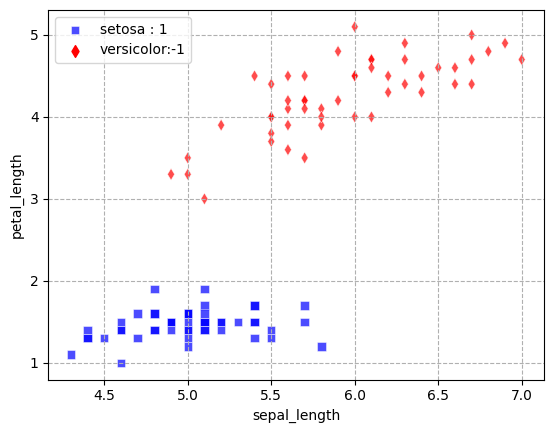

In [13]:
sns.scatterplot(data=df2, x='sepal_length',y='petal_length',
                hue='target',palette=['red', 'blue'],
                style='target',markers=['d', 's'], alpha=0.7)
plt.grid(True, linestyle='--')

plt.legend(labels=['setosa : 1','versicolor:-1'])
plt.show()

4. Realice un proceso de entrenamiento en 5 ocasiones distintas usando la clase “Perceptron” en la cual varié el coeficiente de aprendizaje “eta” desde 0.3 haciendo incrementos de 0.1 hasta 0.7 y en las 5 ocasiones almacene los últimos valores de convergencia 𝑤1,𝑤2 𝑦 𝑏. En las 5 ocasiones use un número de iteraciones “n_iter=20”.
Sobre el mismo gráfico desarrollado en el ítem 3, superponga las 5 ecuaciones lineales provenientes de los valores obtenidos en el ítem 4. Recuerde que la ecuación de separación es:
$$
X_2 = -\frac{w_1}{w_2}.X_1-\frac{b}{w_2}
$$
Solución:


Para esto se utiliza la clase perceptrón 


In [14]:
class Perceptron(object):
    """Clasificador Perceptron.

    Parámetros
    ------------
    eta : float
      Tasa de aprendizaje (entre 0.0 y 1.0)
    n_iter : int
      Número de iteraciones sobre el dataset.
    random_state : int
      Semilla del generador de números aleatorios para la inicialización del peso aleatorio.

    Atributos
    -----------
    w_ : Arreglo 1D
      Pesos antes del entrenamiento (Iniciales).
    errors_ : list
      Número de clasificaciones erróneas (actualizaciones) en cada época.

    """
    #FUNCIÓN PARA INICIALIZAR MI PERCEPTRON
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state


    #FUNCIÓN PARA ENTRENAR MI CONJUNTO DE DATOS USANDO MI PERCEPTRON
    def fit(self, X, y):
        """Datos de entrenamiento para ajustar.

        Parameters
        ----------
        X : {Tipo matriz}, Dimensión = [n_muestras, n_características]
          Training vectors, donde n_muestras es el número de muestras y
          n_características es el número de características.
        y : Tipo vector fila, shape = [n_samples]
          Target values.

        Retorna
        -------
        self : objeto

        """
        rgen = np.random.RandomState(self.random_state)

        """
        Genera el vector de pesos de manera aleatoria [Un peso W1 hasta ...Wn]
        Donde n, corresponde al número de caractarísticas de que presente las
        muestras del dataset + 1 elemento adicional que es el BIAS.
        """
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])

        """
        Incializa el vector de errores vacio, dado que lo llenará en función de
        cada iteración.
        """

        self.errors_ = []
        self.w_historical = [self.w_.copy()]  # Agrega los pesos iniciales a la lista

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            self.w_historical.append(self.w_.copy())  # Guarda una copia de los pesos actuales en cada iteración
        return self

    def net_input(self, X):
        """Calcular la entrada NETA:"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Devolver el valor de predicción final (pasando por la función de activación)"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [15]:
# tasas de aprendisaje
etas = np.arange(0.3,0.8,0.1)
etas

array([0.3, 0.4, 0.5, 0.6, 0.7])

In [16]:
# lista de pesos sesgos y taza de aprendisaje
pesos_y_sesgos_eta=[]
perceptrones=[]
for eta in etas:
    # crea el perceptron con 20 iteraciones 
    perct = Perceptron(eta,20)
    # lo entrena
    perct.fit(X,y)
    # lista de diccionarios con los pesos y sesgos depues del 
    #entrebnamiento y la taza de aprendisaje para el perceptrón
    pesos_y_sesgos_eta.append({'b':perct.w_[0],
                          'w1':perct.w_[1],
                          'w2':perct.w_[2],
                          'eta':eta})  
    perceptrones.append(perct)
print("Pesos y sesgos para una taza de aprendisaje\n")
print(pesos_y_sesgos_eta)

Pesos y sesgos para una taza de aprendisaje

[{'b': 1.2162434536366322, 'w1': 2.0338824358634966, 'w2': -5.465281717522634, 'eta': 0.3}, {'b': 1.6162434536366326, 'w1': 2.713882435863497, 'w2': -7.285281717522635, 'eta': 0.4}, {'b': 2.0162434536366325, 'w1': 3.393882435863497, 'w2': -9.105281717522633, 'eta': 0.5}, {'b': 2.416243453636633, 'w1': 4.073882435863492, 'w2': -10.925281717522639, 'eta': 0.6000000000000001}, {'b': 2.816243453636633, 'w1': 4.753882435863497, 'w2': -12.745281717522637, 'eta': 0.7000000000000002}]


Ahora a crear los graficos 

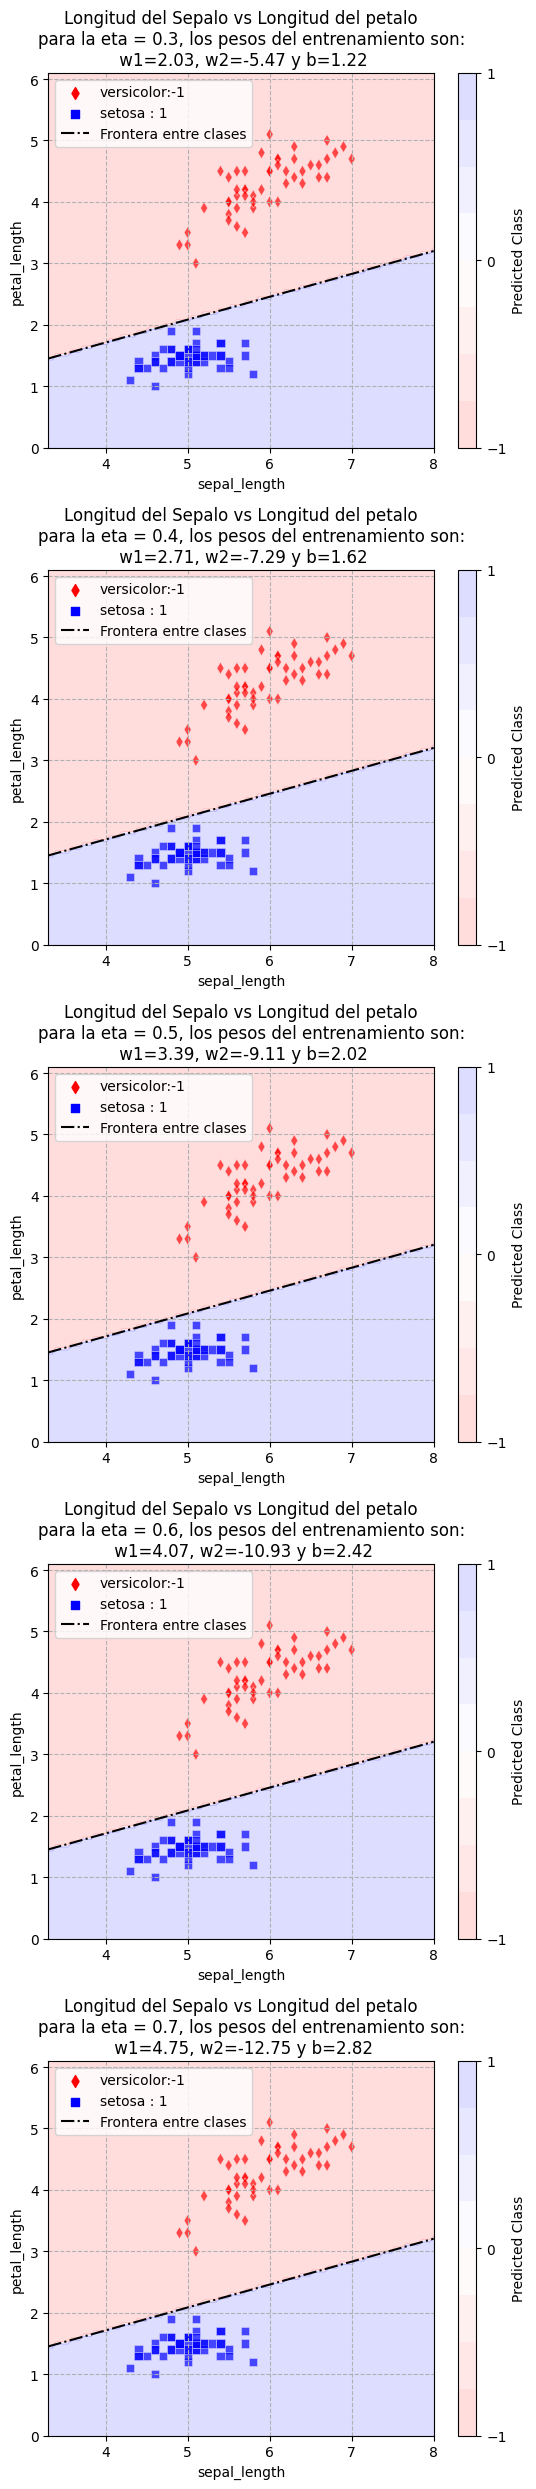

In [17]:
fig, ax = plt.subplots(len(etas), 1,figsize=(5.5, 25))

#limites del grafico
x_max,y_max = X.max(axis=0)+1
x_min,y_min = X.min(axis=0)-1

# puntos del eje x para una linea 
x_line = np.linspace(x_min,x_max , 100)


# grilla de diferencia de clases
x_grid = np.linspace(x_min,x_max , 100)
y_grid = np.linspace(y_min,y_max , 100)
xx, yy = np.meshgrid(x_grid, y_grid)

# crea las graficas
for indice,eta in enumerate(etas):
    
    w1 = pesos_y_sesgos_eta[indice]['w1']
    w2 = pesos_y_sesgos_eta[indice]['w2']
    b = pesos_y_sesgos_eta[indice]['b']
  
    # grafico de dispersion de los datos 
    sns.scatterplot(data=df2, x='sepal_length',y='petal_length',
                hue='target',palette=['red', 'blue'],
                style='target',markers=['d', 's'], 
                alpha=0.7,ax=ax[indice])
    
    # grilla de fondo
    ax[indice].grid(True, linestyle='--')
    
    #titulo
    ax[indice].set_title(f'Longitud del Sepalo vs Longitud del petalo\n\
    para la eta = {eta:.1f}, los pesos del entrenamiento son:\n w1={w1:.2f}, w2={w2:.2f} y b={b:.2f}')
    
    
    # Establecer límites para el eje x
    ax[indice].set_xlim(x_min, x_max)
    # Establecer límites para el eje y
    ax[indice].set_ylim(y_min, y_max)
    
    #graficamos las linea recta de los pesos y sesgo
    y_line = -w1/w2*x_line-b/w2
    ax[indice].plot(x_line,y_line,linestyle='-.',color='black',
                   label='leo')
   
    
    #crea la region de cada clase
    puntos_grilla = np.c_[xx.ravel(), yy.ravel()]
    predict_grilla=perct.predict(puntos_grilla)
    contour = ax[indice].contourf(xx, yy, predict_grilla.reshape(xx.shape),
               cmap=plt.cm.bwr.reversed(), alpha=0.15)
    
    # crea la barra de colores
    cbar = plt.colorbar(contour, ax=ax[indice])
    cbar.set_label('Predicted Class')
    cbar.set_ticks(np.arange(-1, 1+1,1))
    #leyendas
    artistas, etiquetas = ax[indice].get_legend_handles_labels()
    ax[indice].legend(handles=artistas, labels=['versicolor:-1'
                      ,'setosa : 1','Frontera entre clases'])
    plt.tight_layout()

plt.show()

5. Grafique en una sola figura el error obtenido por los 5 procesos de entrenamiento.

Solución: 

Para esto utilizamos la lista con los perceptrones entrenados.

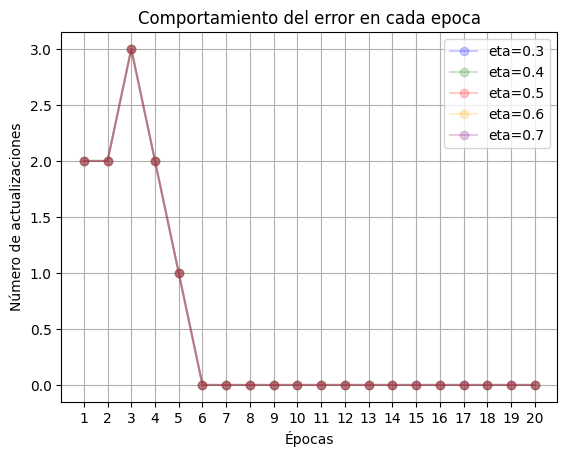

In [18]:
#lista de colores 
colores = ['blue', 'green', 'red', 'orange', 'purple']


for color, eta, perceptron in zip(colores,etas,perceptrones):
    errores = perceptron.errors_
    epocas = np.arange(1,len(errores)+1)
    cmap = plt.cm.get_cmap('viridis')
    
    plt.plot(epocas,errores,alpha = 0.2,marker ='o',
             label = f'eta={eta:.1f}',color = color)
    plt.legend()
plt.xticks(np.arange(1, len(errores) + 1, 1))
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')   
plt.grid(True)
plt.title("Comportamiento del error en cada epoca")
plt.show()

Se observa que todos los perceptrones convergen de la misma forma, es decir su error es el mismo en cada epoca, siendo cero desde la epoca 6 en adelante, a pesar de tener diferentes **tasa de aprendisaje**. 

Esto se debe a que aunque los valores de w1,w2 y b para cada tasa de aprendisaje son diferentes los valores de la pendiente de la recta y el intercepto con el eje y son muy similares veamos:

In [19]:
for indice,eta in enumerate(etas):
    
    w1 = pesos_y_sesgos_eta[indice]['w1']
    w2 = pesos_y_sesgos_eta[indice]['w2']
    b = pesos_y_sesgos_eta[indice]['b']
    
    print(f"Eta={eta:.2f} ---- pendiente={-w1/w2:.4f} ---- intercepto={-b/w2:.4f}")

Eta=0.30 ---- pendiente=0.3721 ---- intercepto=0.2225
Eta=0.40 ---- pendiente=0.3725 ---- intercepto=0.2219
Eta=0.50 ---- pendiente=0.3727 ---- intercepto=0.2214
Eta=0.60 ---- pendiente=0.3729 ---- intercepto=0.2212
Eta=0.70 ---- pendiente=0.3730 ---- intercepto=0.2210


Las rectas son casi la misma recta

6. Tome el que usted considere (justifique su respuesta) el mejor entrenamiento de los 5 realizados anteriormente y evalue las siguientes nuevas muestras usando la función “predict” y llene la columna faltante:

|Muestra Nueva | Longitud del Sépalo | Longitud del Pétalo | Clase obtenida |
|:------------:|:-------------------:|:-------------------:|:--------------:|
|1             | 6.5                 | 2                   | -              |
|2             | 5.5                 | 1                   | -              |
|3             | 5.5                 | 5                   | -              |
|4             | 7                   | 4                   | -              |

Solución:

Creamos primero el dataframe con los nuevos datos y los vamos a evaluar en cada perceptrón

In [20]:
datos_nuevos = {
    'Longitud del Sépalo': [6.5, 5.5, 5.5, 7],
    'Longitud del Pétalo': [2, 1, 5, 4],
}



df_datos_nuevo = pd.DataFrame(datos_nuevos)
df_datos_nuevo

,Longitud del Sépalo,Longitud del Pétalo
0,6.5,2
1,5.5,1
2,5.5,5
3,7.0,4


In [21]:
# se construye la matriz de caracteristicas para los nuevos datos 
X_dato_nuevo = df_datos_nuevo.values

valores_predichos ={}
for eta, perceptron in zip(etas, perceptrones):
    valor_predicho=(perceptron.predict(X_dato_nuevo))
    print(f"eta={eta:.2f}, valores_predichos={valor_predicho}")
    valores_predichos[f'eta:{eta:.1f}'] = valor_predicho 
    

eta=0.30, valores_predichos=[ 1  1 -1 -1]
eta=0.40, valores_predichos=[ 1  1 -1 -1]
eta=0.50, valores_predichos=[ 1  1 -1 -1]
eta=0.60, valores_predichos=[ 1  1 -1 -1]
eta=0.70, valores_predichos=[ 1  1 -1 -1]


In [22]:
for key, valor in valores_predichos.items():
    df_datos_nuevo[key] = valor

In [23]:
df_datos_nuevo

,Longitud del Sépalo,Longitud del Pétalo,eta:0.3,eta:0.4,eta:0.5,eta:0.6,eta:0.7
0,6.5,2,1,1,1,1,1
1,5.5,1,1,1,1,1,1
2,5.5,5,-1,-1,-1,-1,-1
3,7.0,4,-1,-1,-1,-1,-1


Vemos que los valores predecidos por cada perceptrón con diferente tasa de aprendisaje son los mismos, para los valores o muestras nuevas, esto se debe a que las rectas frontera son muy parecidas son iguales en las dos primeras cifra decimales como se vío en el punto anterior. 

Por tanto, no hay un mejor entrenamiento que otro o perceptron mejor de otro, ya que, la grafica del error es la misma para cada perceptrón.

Ahora grafiquemos los puntos para ver si esta haciendo correctamente la tarea el perceptrón


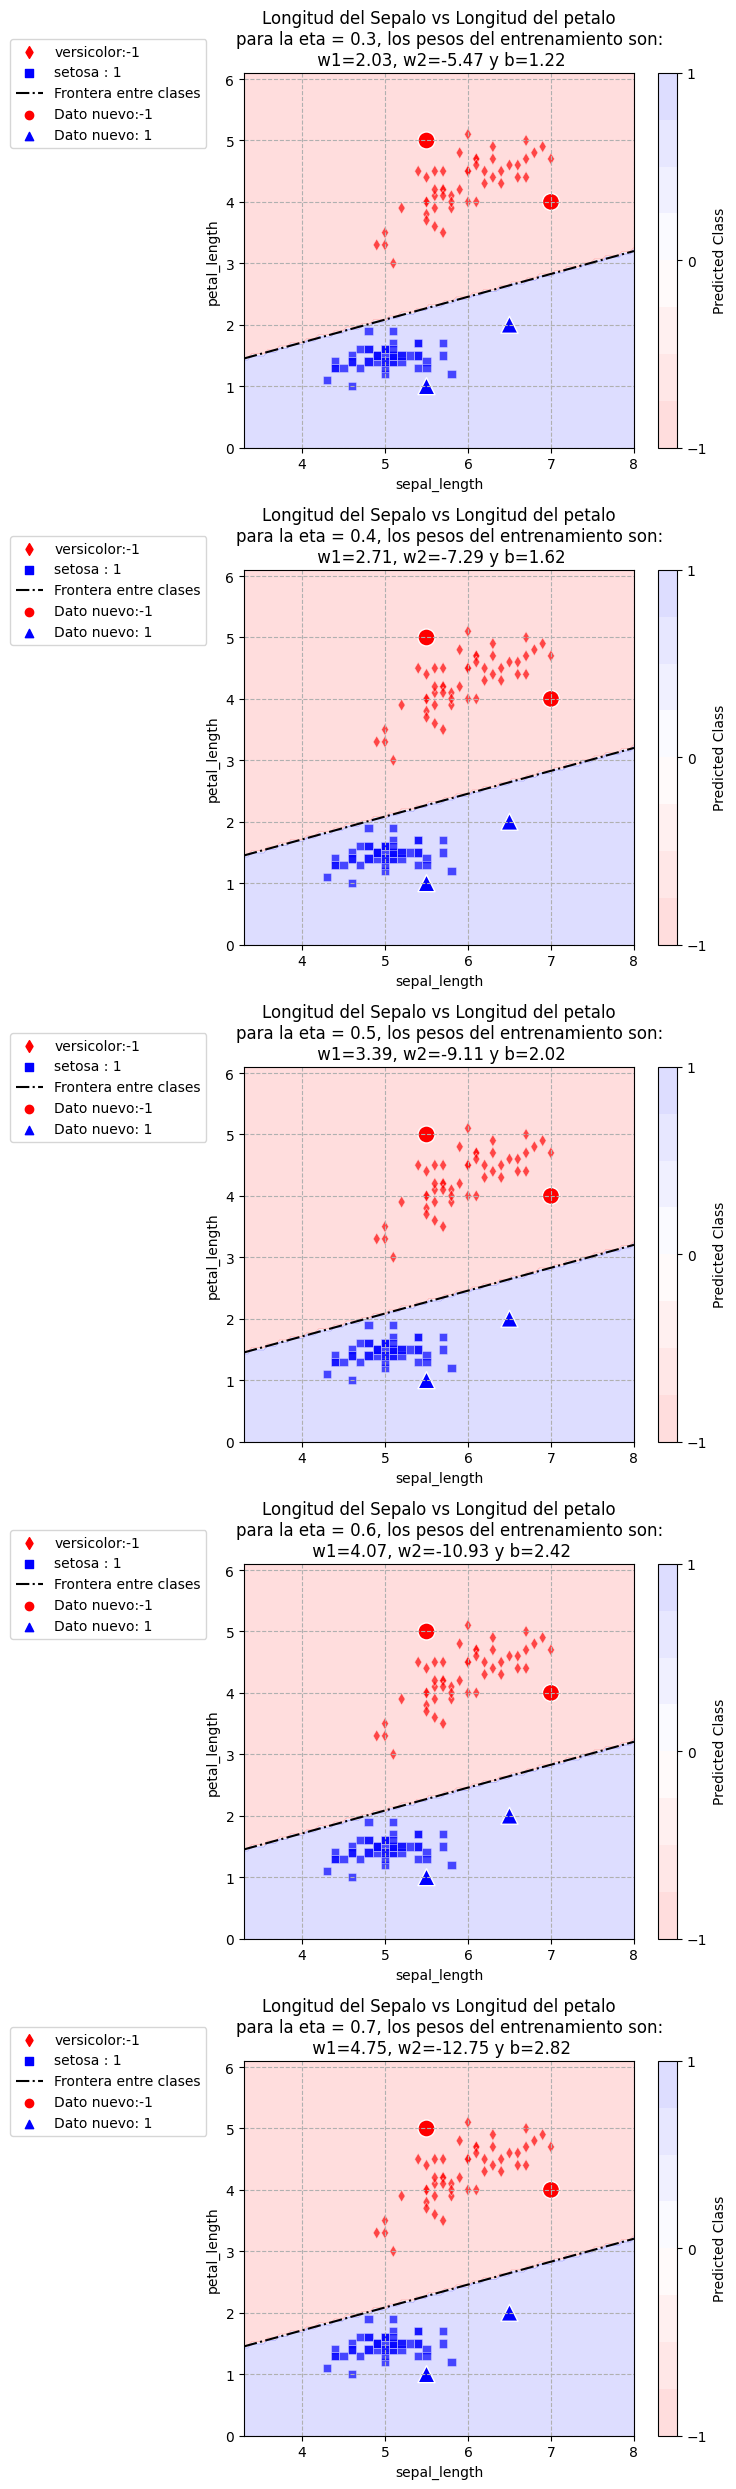

In [96]:
fig, ax = plt.subplots(len(etas), 1,figsize=(7.5, 25))

#limites del grafico
x_max,y_max = X.max(axis=0)+1
x_min,y_min = X.min(axis=0)-1

# puntos del eje x para una linea 
x_line = np.linspace(x_min,x_max , 100)


# grilla de diferencia de clases
x_grid = np.linspace(x_min,x_max , 100)
y_grid = np.linspace(y_min,y_max , 100)
xx, yy = np.meshgrid(x_grid, y_grid)

# crea las graficas
for indice,eta in enumerate(etas):
    
    w1 = pesos_y_sesgos_eta[indice]['w1']
    w2 = pesos_y_sesgos_eta[indice]['w2']
    b = pesos_y_sesgos_eta[indice]['b']
  
    # grafico de dispersion de los datos 
    sns.scatterplot(data=df2, x='sepal_length',y='petal_length',
                hue='target',palette=['red', 'blue'],
                style='target',markers=['d', 's'], 
                alpha=0.7,ax=ax[indice])
    
    # grilla de fondo
    ax[indice].grid(True, linestyle='--')
    
    #titulo
    ax[indice].set_title(f'Longitud del Sepalo vs Longitud del petalo\n\
    para la eta = {eta:.1f}, los pesos del entrenamiento son:\n w1={w1:.2f}, w2={w2:.2f} y b={b:.2f}')
    
    
    # Establecer límites para el eje x
    ax[indice].set_xlim(x_min, x_max)
    # Establecer límites para el eje y
    ax[indice].set_ylim(y_min, y_max)
    
    #graficamos las linea recta de los pesos y sesgo
    y_line = -w1/w2*x_line-b/w2
    ax[indice].plot(x_line,y_line,linestyle='-.',color='black',
                   label='leo')
   
    
    #crea la region de cada clase
    puntos_grilla = np.c_[xx.ravel(), yy.ravel()]
    predict_grilla=perct.predict(puntos_grilla)
    contour = ax[indice].contourf(xx, yy, predict_grilla.reshape(xx.shape),
               cmap=plt.cm.bwr.reversed(), alpha=0.15)
    
    # crea la barra de colores
    cbar = plt.colorbar(contour, ax=ax[indice])
    cbar.set_label('Predicted Class')
    cbar.set_ticks(np.arange(-1, 1+1,1))
    
    # nuevos datos
    sns.scatterplot(data=df_datos_nuevo, 
                    x='Longitud del Sépalo',y='Longitud del Pétalo',
                    
                  hue=f'eta:{eta}',palette=['red', 'blue'],
                 style=f'eta:{eta}',markers=['o', '^'], 
                 s=150,    
                alpha=1,ax=ax[indice])
    
    #leyendas
    artistas, etiquetas = ax[indice].get_legend_handles_labels()
    ax[indice].legend(handles=artistas, labels=['versicolor:-1'
                      ,'setosa : 1','Frontera entre clases',
                        "Dato nuevo:-1","Dato nuevo: 1"],loc=(-0.6,0.8))
    
    plt.tight_layout()

plt.show()

7. Tenga la libertad de modificar y crear una nueva clase llamada “Perceptron2” en la cual en este caso utilice la función de activación Escalón Binario Unipolar (0,1). Repita Todo el taller desde el ítem 2 (dado que tendrá que cambiar el vector “y”) usando esta nueva función “Perceptron2”.

Solución:

Para este punto se modificara el nombre de la calse Perceptron a Perceptron_2, debido al cambio en su función activación, ademas, de las etiquetas de la clase objetivo.


In [24]:
class Perceptron_2(object):
    """Clasificador Perceptron.

    Parámetros
    ------------
    eta : float
      Tasa de aprendizaje (entre 0.0 y 1.0)
    n_iter : int
      Número de iteraciones sobre el dataset.
    random_state : int
      Semilla del generador de números aleatorios para la inicialización del peso aleatorio.

    Atributos
    -----------
    w_ : Arreglo 1D
      Pesos antes del entrenamiento (Iniciales).
    errors_ : list
      Número de clasificaciones erróneas (actualizaciones) en cada época.

    """
    #FUNCIÓN PARA INICIALIZAR MI PERCEPTRON
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state


    #FUNCIÓN PARA ENTRENAR MI CONJUNTO DE DATOS USANDO MI PERCEPTRON
    def fit(self, X, y):
        """Datos de entrenamiento para ajustar.

        Parameters
        ----------
        X : {Tipo matriz}, Dimensión = [n_muestras, n_características]
          Training vectors, donde n_muestras es el número de muestras y
          n_características es el número de características.
        y : Tipo vector fila, shape = [n_samples]
          Target values.

        Retorna
        -------
        self : objeto

        """
        rgen = np.random.RandomState(self.random_state)

        """
        Genera el vector de pesos de manera aleatoria [Un peso W1 hasta ...Wn]
        Donde n, corresponde al número de caractarísticas de que presente las
        muestras del dataset + 1 elemento adicional que es el BIAS.
        """
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])

        """
        Incializa el vector de errores vacio, dado que lo llenará en función de
        cada iteración.
        """

        self.errors_ = []
        self.w_historical = [self.w_.copy()]  # Agrega los pesos iniciales a la lista

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            self.w_historical.append(self.w_.copy())  # Guarda una copia de los pesos actuales en cada iteración
        return self

    def net_input(self, X):
        """Calcular la entrada NETA:"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Devolver el valor de predicción final (pasando por la función de activación)"""
        #cambio en la funcion activacion -1 por 0
        return np.where(self.net_input(X) >= 0.0, 1, 0)

Ahora entrenemos unos nuevos perceptrones con esta clase

In [25]:
# lista de pesos sesgos y taza de aprendisaje
pesos_y_sesgos_eta_2=[]
perceptrones_2=[]
for eta in etas:
    # crea el perceptron con 20 iteraciones 
    perct_2 = Perceptron_2(eta,20)
    # lo entrena
    perct_2.fit(X,y)
    # lista de diccionarios con los pesos y sesgos depues del 
    #entrebnamiento y la taza de aprendisaje para el perceptrón
    pesos_y_sesgos_eta_2.append({'b':perct_2.w_[0],
                          'w1':perct_2.w_[1],
                          'w2':perct_2.w_[2],
                          'eta':eta})  
    perceptrones_2.append(perct_2)
print("Pesos y sesgos para una taza de aprendisaje\n")
print(pesos_y_sesgos_eta_2)

Pesos y sesgos para una taza de aprendisaje

[{'b': -14.98375654636338, 'w1': -354.66611756413727, 'w2': -861.7552817175256, 'eta': 0.3}, {'b': -19.983756546363363, 'w1': -472.88611756413485, 'w2': -1149.0052817175276, 'eta': 0.4}, {'b': -24.983756546363367, 'w1': -591.106117564138, 'w2': -1436.2552817175192, 'eta': 0.5}, {'b': -29.983756546363395, 'w1': -709.3261175641381, 'w2': -1723.5052817175285, 'eta': 0.6000000000000001}, {'b': -34.98375654636336, 'w1': -827.5461175641349, 'w2': -2010.7552817175247, 'eta': 0.7000000000000002}]


Grafiquemoslos

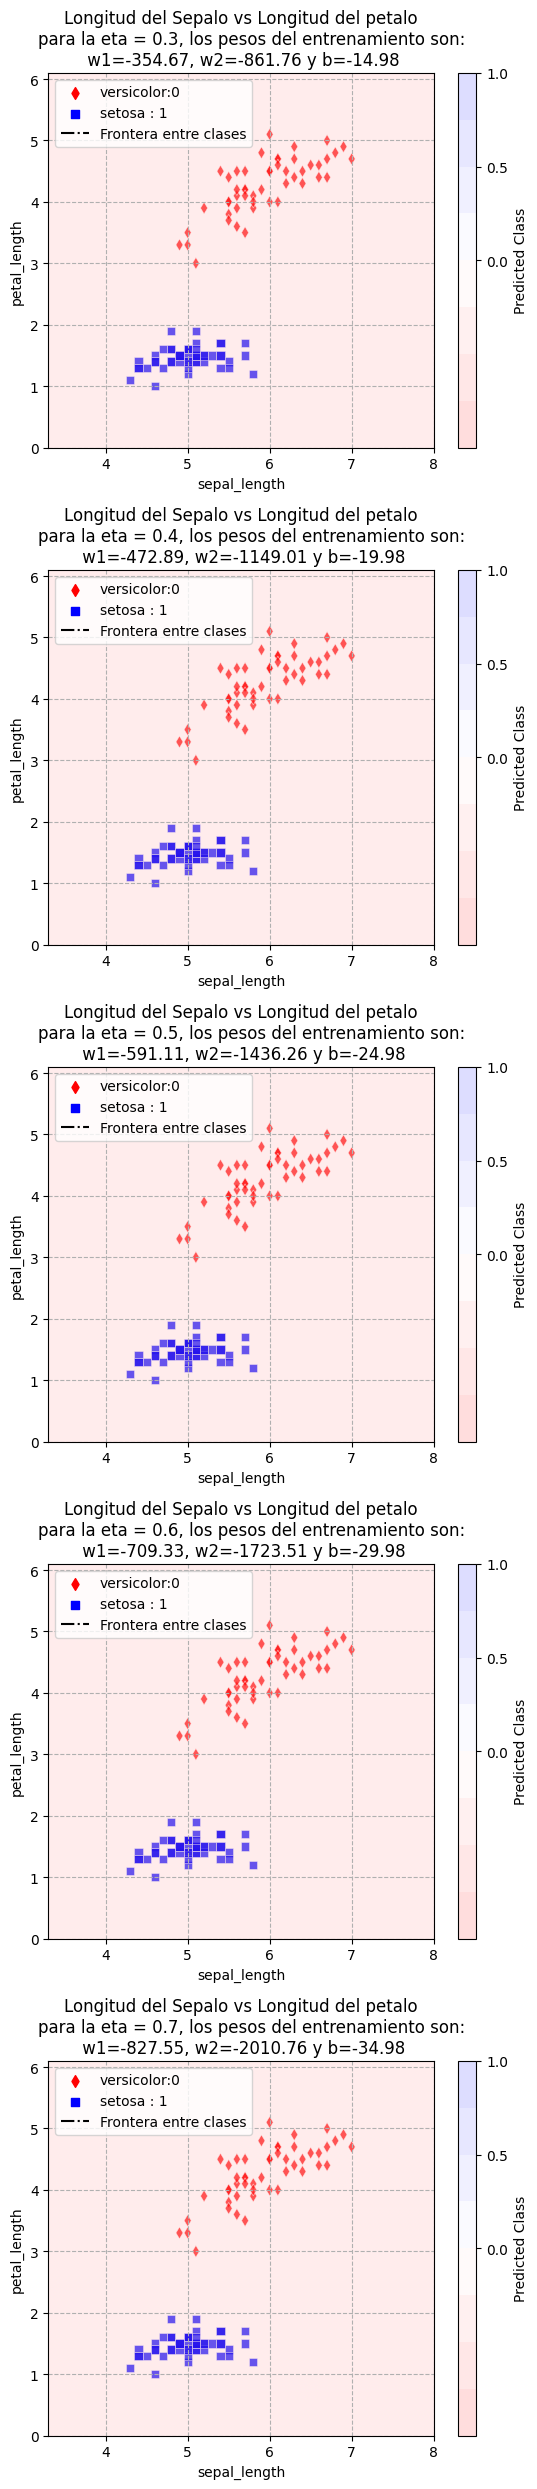

In [26]:
fig, ax = plt.subplots(len(etas), 1,figsize=(5.5, 25))

#limites del grafico
x_max,y_max = X.max(axis=0)+1
x_min,y_min = X.min(axis=0)-1

# puntos del eje x para una linea 
x_line = np.linspace(x_min,x_max , 100)


# grilla de diferencia de clases
x_grid = np.linspace(x_min,x_max , 100)
y_grid = np.linspace(y_min,y_max , 100)
xx, yy = np.meshgrid(x_grid, y_grid)

# crea las graficas
for indice,eta in enumerate(etas):
    
    w1 = pesos_y_sesgos_eta_2[indice]['w1']
    w2 = pesos_y_sesgos_eta_2[indice]['w2']
    b = pesos_y_sesgos_eta_2[indice]['b']
  
    # grafico de dispersion de los datos 
    sns.scatterplot(data=df2, x='sepal_length',y='petal_length',
                hue='target',palette=['red', 'blue'],
                style='target',markers=['d', 's'], 
                alpha=0.7,ax=ax[indice])
    
    # grilla de fondo
    ax[indice].grid(True, linestyle='--')
    
    #titulo
    ax[indice].set_title(f'Longitud del Sepalo vs Longitud del petalo\n\
    para la eta = {eta:.1f}, los pesos del entrenamiento son:\n w1={w1:.2f}, w2={w2:.2f} y b={b:.2f}')
    
    
    # Establecer límites para el eje x
    ax[indice].set_xlim(x_min, x_max)
    # Establecer límites para el eje y
    ax[indice].set_ylim(y_min, y_max)
    
    #graficamos las linea recta de los pesos y sesgo
    y_line = -w1/w2*x_line-b/w2
    ax[indice].plot(x_line,y_line,linestyle='-.',color='black',
                   label='leo')
   
    
    #crea la region de cada clase
    puntos_grilla = np.c_[xx.ravel(), yy.ravel()]
    predict_grilla=perct_2.predict(puntos_grilla)
    ax[indice].contourf(xx, yy, predict_grilla.reshape(xx.shape),
               cmap=plt.cm.bwr.reversed(), alpha=0.15)
    # crea la barra de colores
    cbar = plt.colorbar(contour, ax=ax[indice])
    cbar.set_label('Predicted Class')
    cbar.set_ticks(np.arange(0, 1+0.5,0.5))
    #leyendas
    artistas, etiquetas = ax[indice].get_legend_handles_labels()
    ax[indice].legend(handles=artistas, labels=['versicolor:0'
                      ,'setosa : 1','Frontera entre clases'])
    plt.tight_layout()

plt.show()

Como se observa la frontera entre clases no aparece, y los valores de los pesos son bastante altos, veamos como son la pendiente y el itercepto de la linea frontera y grafiquemnos su error 

In [27]:
for indice,eta in enumerate(etas):
    
    w1 = pesos_y_sesgos_eta_2[indice]['w1']
    w2 = pesos_y_sesgos_eta_2[indice]['w2']
    b = pesos_y_sesgos_eta_2[indice]['b']
    
    print(f"Eta={eta:.2f} ---- pendiente={-w1/w2:.6f} ---- intercepto={-b/w2:.6f}")

Eta=0.30 ---- pendiente=-0.411562 ---- intercepto=-0.017387
Eta=0.40 ---- pendiente=-0.411561 ---- intercepto=-0.017392
Eta=0.50 ---- pendiente=-0.411561 ---- intercepto=-0.017395
Eta=0.60 ---- pendiente=-0.411560 ---- intercepto=-0.017397
Eta=0.70 ---- pendiente=-0.411560 ---- intercepto=-0.017398


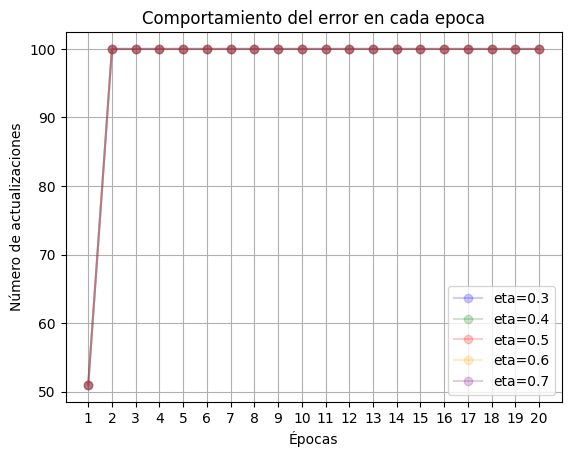

In [28]:
#lista de colores 
colores = ['blue', 'green', 'red', 'orange', 'purple']


for color, eta, perceptron in zip(colores,etas,perceptrones_2):
    errores = perceptron.errors_
    epocas = np.arange(1,len(errores)+1)
    cmap = plt.cm.get_cmap('viridis')
    
    plt.plot(epocas,errores,alpha = 0.2,marker ='o',
             label = f'eta={eta:.1f}',color = color)
    plt.legend()
plt.xticks(np.arange(1, len(errores) + 1, 1))
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')   
plt.grid(True)
plt.title("Comportamiento del error en cada epoca")
plt.show()

Vemos que en cada epoca ajusta 100 veces los pesos y el sesgo, en otras palabras no esta aprendiendo.

Miremos los valores de la pendiente y el intepcepto de la recta frontera entre clases

Vemos que son valores muy pequeños y ambos negativos, por tanto, el perceptron no aprendio. **A que se debe esto**??

La respuesta es que el perceptron_2 predice ceros y unos y las etiquetas de los datos se encuentran en 1 y -1, por tanto, falla en poder clasificar, para quitar este error se debe cambiar las etiquertas de 1 y -1 a 1 y 0. 

De este modo el error |target-y_predict|=0 para las mismas clases


Con este fin

In [29]:
df2

,sepal_length,petal_length,target
0,5.1,1.4,1
1,4.9,1.4,1
2,4.7,1.3,1
3,4.6,1.5,1
4,5.0,1.4,1
...,...,...,...
95,5.7,4.2,-1
96,5.7,4.2,-1
97,6.2,4.3,-1
98,5.1,3.0,-1


In [30]:
# reemplaza los valores de -1 por cero
df2['target'] = df2['target'].replace(-1, 0)

In [31]:
df2

,sepal_length,petal_length,target
0,5.1,1.4,1
1,4.9,1.4,1
2,4.7,1.3,1
3,4.6,1.5,1
4,5.0,1.4,1
...,...,...,...
95,5.7,4.2,0
96,5.7,4.2,0
97,6.2,4.3,0
98,5.1,3.0,0


Ya habiendo cambiado el valor de -1 a 0 en la clase objetivo podemos volver a entrenar los perceptrones y ver como se comportan en el proceso de entrenamiento. Para esto generemos de nuevo el vector y objetivo.

In [32]:
y_2 = df2["target"].values
print(y_2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Ahora entrenemos los perceptrones con las clases {0,1}

In [33]:
# lista de pesos sesgos y taza de aprendisaje
pesos_y_sesgos_eta_3=[]
perceptrones_3=[]
for eta in etas:
    # crea el perceptron con 20 iteraciones 
    perct_3 = Perceptron_2(eta,20)
    # lo entrena
    perct_3.fit(X,y_2)
    # lista de diccionarios con los pesos y sesgos depues del 
    #entrebnamiento y la taza de aprendisaje para el perceptrón
    pesos_y_sesgos_eta_3.append({'b':perct_3.w_[0],
                          'w1':perct_3.w_[1],
                          'w2':perct_3.w_[2],
                          'eta':eta})  
    perceptrones_3.append(perct_3)
print("Pesos y sesgos para una taza de aprendisaje\n")
print(pesos_y_sesgos_eta_3)

Pesos y sesgos para una taza de aprendisaje

[{'b': 0.6162434536366324, 'w1': 1.013882435863498, 'w2': -2.7352817175226347, 'eta': 0.3}, {'b': 0.8162434536366325, 'w1': 1.3538824358634982, 'w2': -3.6452817175226344, 'eta': 0.4}, {'b': 1.0162434536366325, 'w1': 1.693882435863498, 'w2': -4.555281717522634, 'eta': 0.5}, {'b': 1.2162434536366327, 'w1': 2.0338824358634957, 'w2': -5.465281717522637, 'eta': 0.6000000000000001}, {'b': 1.4162434536366328, 'w1': 2.373882435863499, 'w2': -6.375281717522636, 'eta': 0.7000000000000002}]


Vemos que los valores de los pesos y sesgos ya no son tan grandes, ahora grafiquemos las clases y la recta frontera

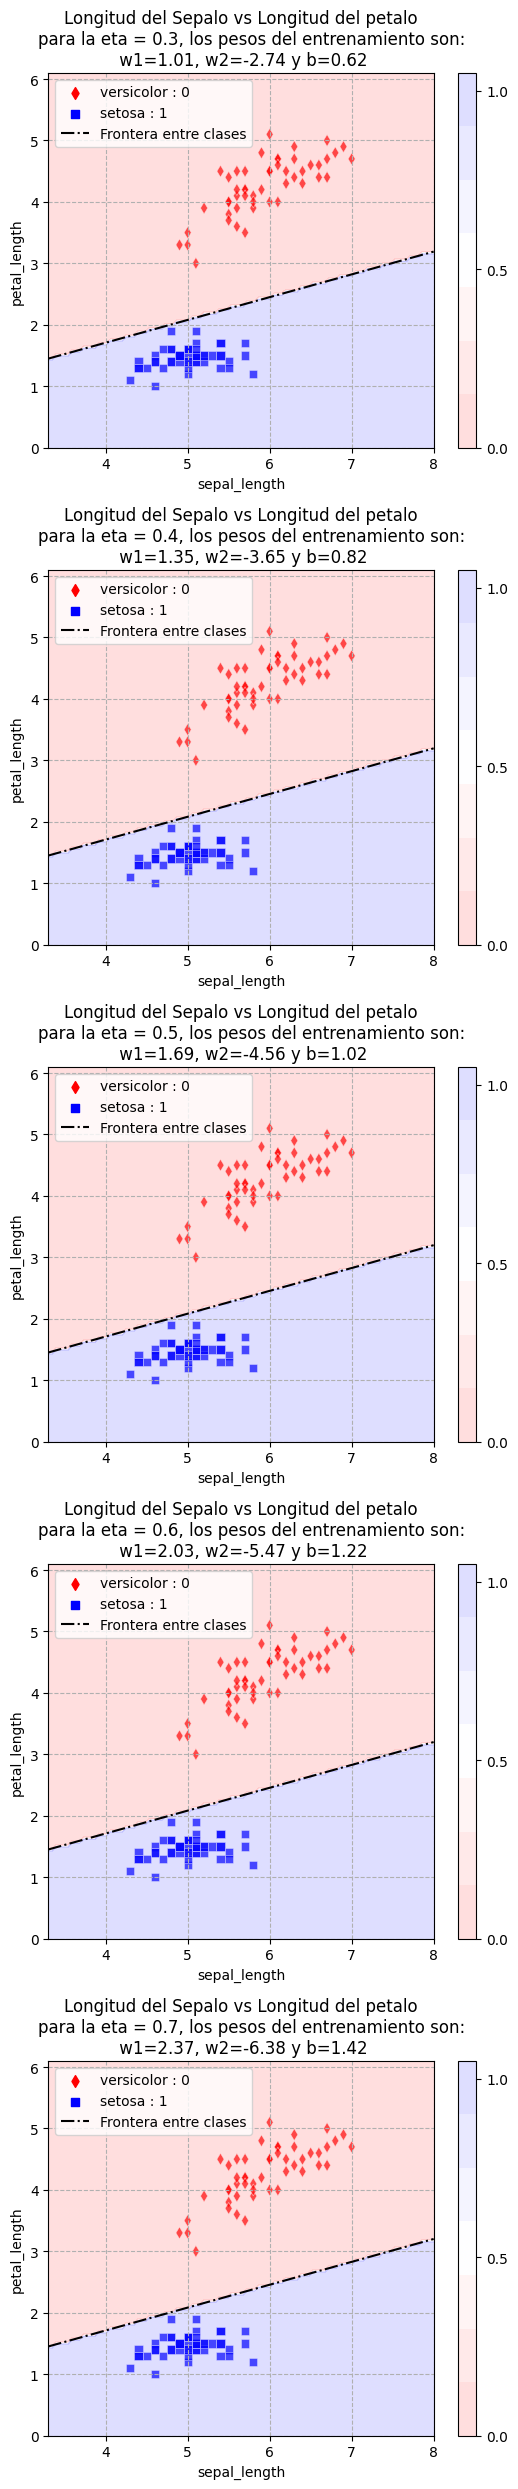

In [34]:
fig, ax = plt.subplots(len(etas), 1,figsize=(5.5, 25))

#limites del grafico
x_max,y_max = X.max(axis=0)+1
x_min,y_min = X.min(axis=0)-1

# puntos del eje x para una linea 
x_line = np.linspace(x_min,x_max , 100)


# grilla de diferencia de clases
x_grid = np.linspace(x_min,x_max , 100)
y_grid = np.linspace(y_min,y_max , 100)
xx, yy = np.meshgrid(x_grid, y_grid)

# crea las graficas
for indice,eta in enumerate(etas):
    
    w1 = pesos_y_sesgos_eta_3[indice]['w1']
    w2 = pesos_y_sesgos_eta_3[indice]['w2']
    b = pesos_y_sesgos_eta_3[indice]['b']
  
    # graico de dispersion de los datos 
    sns.scatterplot(data=df2, x='sepal_length',y='petal_length',
                hue='target',palette=['red', 'blue'],
                style='target',markers=['d', 's'], 
                alpha=0.7,ax=ax[indice])
    
    # grilla de fondo
    ax[indice].grid(True, linestyle='--')
    
    #titulo
    ax[indice].set_title(f'Longitud del Sepalo vs Longitud del petalo\n\
    para la eta = {eta:.1f}, los pesos del entrenamiento son:\n w1={w1:.2f}, w2={w2:.2f} y b={b:.2f}')
    
    
    # Establecer límites para el eje x
    ax[indice].set_xlim(x_min, x_max)
    # Establecer límites para el eje y
    ax[indice].set_ylim(y_min, y_max)
    
    #graficamos las linea recta de los pesos y sesgo
    y_line = -w1/w2*x_line-b/w2
    ax[indice].plot(x_line,y_line,linestyle='-.',color='black',
                   label='leo')
   
    
    #crea la region de cada clase
    puntos_grilla = np.c_[xx.ravel(), yy.ravel()]
    predict_grilla=perct_3.predict(puntos_grilla)
    contour = ax[indice].contourf(xx, yy, predict_grilla.reshape(xx.shape),
               cmap=plt.cm.bwr.reversed(), alpha=0.15)
    
    cbar = plt.colorbar(contour, ax=ax[indice])
    cbar.set_ticks(np.arange(0, 1+0.5,0.5))
    #leyendas
    artistas, etiquetas = ax[indice].get_legend_handles_labels()
    ax[indice].legend(handles=artistas, labels=['versicolor : 0'
                      ,'setosa : 1','Frontera entre clases'])
    plt.tight_layout()

plt.show()

Vemos como los perceptrones convergen de nuevo es decir si aprenden; veamos que valor tienen las pendientes y los interceptos 

In [35]:
for indice,eta in enumerate(etas):
    
    w1 = pesos_y_sesgos_eta_3[indice]['w1']
    w2 = pesos_y_sesgos_eta_3[indice]['w2']
    b = pesos_y_sesgos_eta_3[indice]['b']
    
    print(f"Eta={eta:.2f} ---- pendiente={-w1/w2:.4f} ---- intercepto={-b/w2:.4f}")

Eta=0.30 ---- pendiente=0.3707 ---- intercepto=0.2253
Eta=0.40 ---- pendiente=0.3714 ---- intercepto=0.2239
Eta=0.50 ---- pendiente=0.3719 ---- intercepto=0.2231
Eta=0.60 ---- pendiente=0.3721 ---- intercepto=0.2225
Eta=0.70 ---- pendiente=0.3724 ---- intercepto=0.2221


Como es de esperar los valores para cada tasa de aprendisaje son muy similares e iguales en las dos primeras cifras decimales.

Ahora grafiquemos ahora el error.

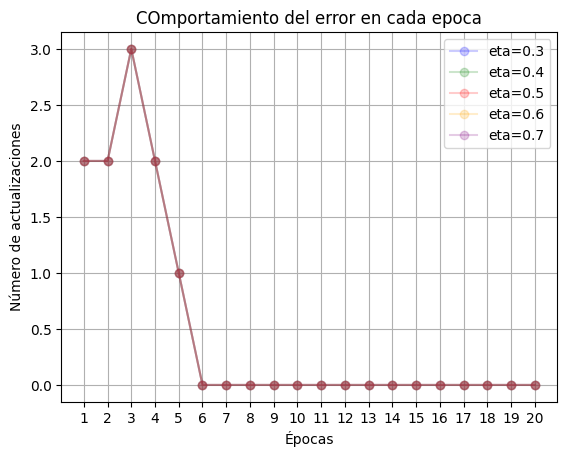

In [36]:
#lista de colores 
colores = ['blue', 'green', 'red', 'orange', 'purple']


for color, eta, perceptron in zip(colores,etas,perceptrones_3):
    errores = perceptron.errors_
    epocas = np.arange(1,len(errores)+1)
    cmap = plt.cm.get_cmap('viridis')
    
    plt.plot(epocas,errores,alpha = 0.2,marker ='o',
             label = f'eta={eta:.1f}',color = color)
    plt.legend()
plt.xticks(np.arange(1, len(errores) + 1, 1))
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')   
plt.grid(True)
plt.title("COmportamiento del error en cada epoca")
plt.show()

Como se observa en las graficas anteriores los perceptrones con la función escalon {0,1} y las clases etiquetadas de la misma manera {0,1} converge identicamente en 5 actualizaciones, al igual  que los perceptrones con el escalon {-1,1} y las clases {-1,1}, sin embargo los valores de los pesos son ligeramente diferentres. veamos:

Finalmente obtengamos las predicciones 

In [37]:
valores_predichos_3 ={}
for eta, perceptron in zip(etas, perceptrones_3):
    valor_predicho=(perceptron.predict(X_dato_nuevo))
    print(f"eta={eta:.2f}, valores_predichos={valor_predicho}")
    valores_predichos_3[f'eta:{eta:.1f}'] = valor_predicho 

eta=0.30, valores_predichos=[1 1 0 0]
eta=0.40, valores_predichos=[1 1 0 0]
eta=0.50, valores_predichos=[1 1 0 0]
eta=0.60, valores_predichos=[1 1 0 0]
eta=0.70, valores_predichos=[1 1 0 0]


Vemos que independiente de la tasa de aprendisaje, el resultado es el mismo, de las misma manera que para las clases {-1,1}.

Ahora veamos los valores de lasd pendientes y interceptos para los tres conjuntos de perceptrones

In [38]:
print("Activacion {-1,1} y clase {-1,1}\n")
for indice,eta in enumerate(etas):
    
    w1 = pesos_y_sesgos_eta[indice]['w1']
    w2 = pesos_y_sesgos_eta[indice]['w2']
    b = pesos_y_sesgos_eta[indice]['b']
    
    print(f"Eta={eta:.2f} ---- pendiente={-w1/w2:.4f} ---- intercepto={-b/w2:.4f}")
    
print("\nActivacion {-1,1} y clase {0,1}\n")
for indice,eta in enumerate(etas):
    
    w1 = pesos_y_sesgos_eta_2[indice]['w1']
    w2 = pesos_y_sesgos_eta_2[indice]['w2']
    b = pesos_y_sesgos_eta_2[indice]['b']
    
    print(f"Eta={eta:.2f} ---- pendiente={-w1/w2:.4f} ---- intercepto={-b/w2:.4f}")
print("\nActivacion {0,1} y clase {0,1}\n")

for indice,eta in enumerate(etas):
    
    w1 = pesos_y_sesgos_eta_3[indice]['w1']
    w2 = pesos_y_sesgos_eta_3[indice]['w2']
    b = pesos_y_sesgos_eta_3[indice]['b']
    
    print(f"Eta={eta:.2f} ---- pendiente={-w1/w2:.4f} ---- intercepto={-b/w2:.4f}")

Activacion {-1,1} y clase {-1,1}

Eta=0.30 ---- pendiente=0.3721 ---- intercepto=0.2225
Eta=0.40 ---- pendiente=0.3725 ---- intercepto=0.2219
Eta=0.50 ---- pendiente=0.3727 ---- intercepto=0.2214
Eta=0.60 ---- pendiente=0.3729 ---- intercepto=0.2212
Eta=0.70 ---- pendiente=0.3730 ---- intercepto=0.2210

Activacion {-1,1} y clase {0,1}

Eta=0.30 ---- pendiente=-0.4116 ---- intercepto=-0.0174
Eta=0.40 ---- pendiente=-0.4116 ---- intercepto=-0.0174
Eta=0.50 ---- pendiente=-0.4116 ---- intercepto=-0.0174
Eta=0.60 ---- pendiente=-0.4116 ---- intercepto=-0.0174
Eta=0.70 ---- pendiente=-0.4116 ---- intercepto=-0.0174

Activacion {0,1} y clase {0,1}

Eta=0.30 ---- pendiente=0.3707 ---- intercepto=0.2253
Eta=0.40 ---- pendiente=0.3714 ---- intercepto=0.2239
Eta=0.50 ---- pendiente=0.3719 ---- intercepto=0.2231
Eta=0.60 ---- pendiente=0.3721 ---- intercepto=0.2225
Eta=0.70 ---- pendiente=0.3724 ---- intercepto=0.2221


Vemos que los valores de la pentiente y el intercepto de3 la recta frontera entyre clases es muy similar para los casos 1 y 3, es decir cuando la función activación y las etiquetas tienen el mismo valor binario, ademas, es cuando el modelo aprende y clasifica correctamente las dos clases.

Veamos como clasifica los datos nuevos


In [39]:
valores_predichos_3 ={}
for eta, perceptron in zip(etas, perceptrones_3):
    valor_predicho=(perceptron.predict(X_dato_nuevo))
    print(f"eta={eta:.2f}, valores_predichos={valor_predicho}")
    valores_predichos_3[f'eta:{eta:.1f}'] = valor_predicho 
    

eta=0.30, valores_predichos=[1 1 0 0]
eta=0.40, valores_predichos=[1 1 0 0]
eta=0.50, valores_predichos=[1 1 0 0]
eta=0.60, valores_predichos=[1 1 0 0]
eta=0.70, valores_predichos=[1 1 0 0]


Finalmente agrupemos todo en un dataframe pare observar mejor 

In [40]:
valores_predichos_finales =[]
for eta, perceptron in zip(list(etas)*3, perceptrones+
                           perceptrones_2+perceptrones_3):
    valor_predicho=(perceptron.predict(X_dato_nuevo))
    print(f"eta={eta:.2f}, valores_predichos={valor_predicho}")
    valores_predichos_finales.append( valor_predicho) 
    


eta=0.30, valores_predichos=[ 1  1 -1 -1]
eta=0.40, valores_predichos=[ 1  1 -1 -1]
eta=0.50, valores_predichos=[ 1  1 -1 -1]
eta=0.60, valores_predichos=[ 1  1 -1 -1]
eta=0.70, valores_predichos=[ 1  1 -1 -1]
eta=0.30, valores_predichos=[0 0 0 0]
eta=0.40, valores_predichos=[0 0 0 0]
eta=0.50, valores_predichos=[0 0 0 0]
eta=0.60, valores_predichos=[0 0 0 0]
eta=0.70, valores_predichos=[0 0 0 0]
eta=0.30, valores_predichos=[1 1 0 0]
eta=0.40, valores_predichos=[1 1 0 0]
eta=0.50, valores_predichos=[1 1 0 0]
eta=0.60, valores_predichos=[1 1 0 0]
eta=0.70, valores_predichos=[1 1 0 0]


Creemos primero un dataframe con multi index



In [41]:
conjunto_perceptrones = ['Activacion {-1,1} clase {-1,1}', 
                'Activacion {0,1}  clase {-1,1}',
                'Activacion {0,1} clase {0,1}']
etas = [0.3, 0.4, 0.5, 0.6, 0.7]

# Crear un MultiIndex para las columnas
columnas = pd.MultiIndex.from_product([conjunto_perceptrones
                        , etas], names=['Perceptrón', 'Eta'])

# Crear un DataFrame vacío con el MultiIndex de columnas
df_total_nuevos = pd.DataFrame(columns=columnas)

# Asignar valores a las columnas
for i, col in enumerate(df_total_nuevos.columns):
    df_total_nuevos[col] =  valores_predichos_finales[i]

df_total_nuevos['Longitud del Sépalo']= \
df_datos_nuevo['Longitud del Sépalo']

df_total_nuevos['Longitud del Pétalo']= \
df_datos_nuevo['Longitud del Pétalo']

In [42]:
df_total_nuevos

Perceptrón Activacion {-1,1} clase {-1,1}                  \
Eta                                   0.3 0.4 0.5 0.6 0.7   
0                                       1   1   1   1   1   
1                                       1   1   1   1   1   
2                                      -1  -1  -1  -1  -1   
3                                      -1  -1  -1  -1  -1   

Perceptrón Activacion {0,1}  clase {-1,1}                  \
Eta                                   0.3 0.4 0.5 0.6 0.7   
0                                       0   0   0   0   0   
1                                       0   0   0   0   0   
2                                       0   0   0   0   0   
3                                       0   0   0   0   0   

Perceptrón Activacion {0,1} clase {0,1}                 Longitud del Sépalo  \
Eta                                 0.3 0.4 0.5 0.6 0.7                       
0                                     1   1   1   1   1                 6.5   
1                                     1   1   1   1   1                 5.5   
2                                     0   0   0   0   0                 5.5   
3                                     0   0   0   0   0                 7.0   

Perceptrón Longitud del Pétalo  
Eta                             
0                            2  
1                            1  
2                            5  
3                            4

En la salida anterir se observa la inferencia de cada conjunto de perceptrones teniendo en cuenta la función activación y las etiquetas de las clases.

¿Qué puede concluir con los resultados obtenidos comparado con lo realizado anteriormente
en “Perceptron”? que claramente usa la función de activación Escalón Binario Bipolar (-1,1).

Se concluye que las función Escalón Binario Bipolar (-1,1)  da los mismo resultados en cuento a clasificación que Escalón Binario Bipolar (0,1), si y solo si, las clases se etiquetan de las misma forma que la función activacion, es decir con (0,1), ya que sino, el calculo del error seria erroneo lo que conlleva a una falsa actulización de pesos y sesgo. 


8. ¿Qué implicaciones tendría si no se usara el hiperparámetro bias? Consideraría que
serviría para realizar la clasificación del ejercicio:

Solucion:

Para esto se modificara la clase perceptron, quitando el parametro del bias
es decir bias =0.


In [43]:
class Perceptron_3(object):
    """Clasificador Perceptron.

    Parámetros
    ------------
    eta : float
      Tasa de aprendizaje (entre 0.0 y 1.0)
    n_iter : int
      Número de iteraciones sobre el dataset.
    random_state : int
      Semilla del generador de números aleatorios para la inicialización del peso aleatorio.

    Atributos
    -----------
    w_ : Arreglo 1D
      Pesos antes del entrenamiento (Iniciales).
    errors_ : list
      Número de clasificaciones erróneas (actualizaciones) en cada época.

    """
    #FUNCIÓN PARA INICIALIZAR MI PERCEPTRON
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state


    #FUNCIÓN PARA ENTRENAR MI CONJUNTO DE DATOS USANDO MI PERCEPTRON
    def fit(self, X, y):
        """Datos de entrenamiento para ajustar.

        Parameters
        ----------
        X : {Tipo matriz}, Dimensión = [n_muestras, n_características]
          Training vectors, donde n_muestras es el número de muestras y
          n_características es el número de características.
        y : Tipo vector fila, shape = [n_samples]
          Target values.

        Retorna
        -------
        self : objeto

        """
        rgen = np.random.RandomState(self.random_state)

        """
        Genera el vector de pesos de manera aleatoria [Un peso W1 hasta ...Wn]
        Donde n, corresponde al número de caractarísticas de que presente las
        muestras del dataset + 1 elemento adicional que es el BIAS.
        """
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])

        self.w_[0] = 0 # bias igual a cero siempre
        
        """
        Incializa el vector de errores vacio, dado que lo llenará en función de
        cada iteración.
        """

        self.errors_ = []
        self.w_historical = [self.w_.copy()]  # Agrega los pesos iniciales a la lista

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += 0 # bias no actuliza
                errors += int(update != 0.0)
            self.errors_.append(errors)
            self.w_historical.append(self.w_.copy())  # Guarda una copia de los pesos actuales en cada iteración
        return self

    def net_input(self, X):
        """Calcular la entrada NETA:"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Devolver el valor de predicción final (pasando por la función de activación)"""
        
        return np.where(self.net_input(X) >= 0.0, 1, -1)

* Compuerta AND realizado en “Clase_Perceptron_Caso_AND.ipynb”
Solución:

Para ver que pasa se entrenara un perceptrón  


In [44]:
# datos compuerta and

X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Etiquetas de salida deseadas
y_and = np.array([1, 1, 1, -1])

modelo = Perceptron_3(0.3,20)

modelo.fit(X_and,y_and)

pesos_y_sesgos= [modelo.w_[0],modelo.w_[1],modelo.w_[2]]

print("Los pesos son:\n")
pesos_y_sesgos[1:]

Los pesos son:



[-0.006117564136500775, -0.00528171752263451]

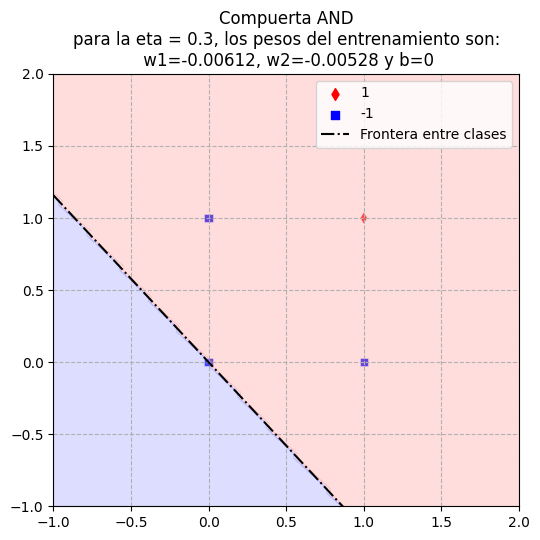

In [45]:
fig, ax = plt.subplots(1, 1,figsize=(5.5, 5.5))

#limites del grafico
x_max,y_max = X_and.max(axis=0)+1
x_min,y_min = X_and.min(axis=0)-1

# puntos del eje x para una linea 
x_line = np.linspace(x_min,x_max , 100)


# grilla de diferencia de clases
x_grid = np.linspace(x_min,x_max , 100)
y_grid = np.linspace(y_min,y_max , 100)
xx, yy = np.meshgrid(x_grid, y_grid)

# crea las graficas


w1 = pesos_y_sesgos[1]
w2 = pesos_y_sesgos[2]
b = pesos_y_sesgos[0]

# grafico de dispersion de los datos 
sns.scatterplot( x=X_and[:,0],y=X_and[:,1],
            hue=y_and,palette=['red', 'blue'],
            style=y_and,markers=['d', 's'], 
            alpha=0.7)

# grilla de fondo
ax.grid(True, linestyle='--')

#titulo
ax.set_title(f'Compuerta AND\n\
para la eta = 0.3, los pesos del entrenamiento son:\n \
w1={w1:.5f}, w2={w2:.5f} y b={b:.0f}')


# Establecer límites para el eje x
ax.set_xlim(x_min, x_max)
# Establecer límites para el eje y
ax.set_ylim(y_min, y_max)

#graficamos las linea recta de los pesos y sesgo
y_line = -w1/w2*x_line-b/w2
ax.plot(x_line,y_line,linestyle='-.',color='black',
               label='leo')


#crea la region de cada clase
puntos_grilla = np.c_[xx.ravel(), yy.ravel()]
predict_grilla=modelo.predict(puntos_grilla)
ax.contourf(xx, yy, predict_grilla.reshape(xx.shape),
           cmap=plt.cm.bwr.reversed(), alpha=0.15)



#leyendas
artistas, etiquetas = ax.get_legend_handles_labels()
ax.legend(handles=artistas, labels=['1',
                '-1','Frontera entre clases'])
plt.tight_layout()

plt.show()

Como se ve en la grafica anterior no clasifica bien el conjunto de la compuerta AND, esto se debe a que no hay ninguna linea recta que pase por el origen y=mx, que pueda separar el conjunto de clases correctamente.

Veamos el error

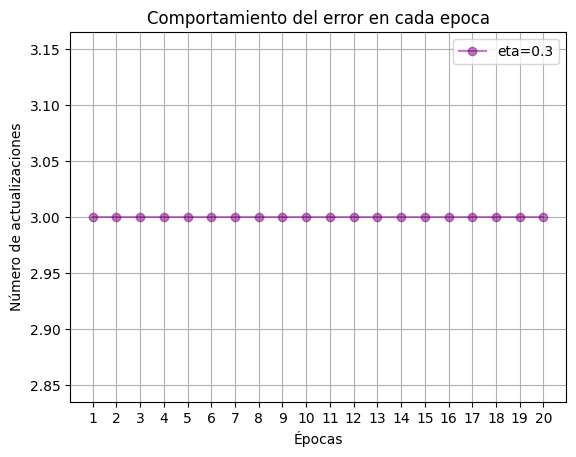

In [46]:
errores = modelo.errors_
epocas = np.arange(1,len(errores)+1)

plt.plot(epocas,errores,alpha = 0.5,marker ='o',
         label = f'eta=0.3',color = "purple")
plt.legend()
plt.xticks(np.arange(1, len(errores) + 1, 1))
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')   
plt.grid(True)
plt.title("Comportamiento del error en cada epoca")
plt.show()

Vemos que el error inicial no puede ser corregido el ajusta los pesos de tres elementos y no puedo encontrar un conjunto de pesos adecuados, esto se debe a que el conjunto no es separable por una linea recta de la forma y=mx.

### Ahora probemos con el iris dataset
Con una taza der aprendisaje de 0.3, que para el caso con sesgo converge rapidamente a la solución y 20 iteraciones. 

In [47]:
modelo_iris = Perceptron_3(0.3,20)

modelo_iris.fit(X,y)

pesos_y_sesgos_iris= [modelo_iris.w_[0],modelo_iris.w_[1],modelo_iris.w_[2]]

print("Los pesos son:\n")
pesos_y_sesgos_iris[1:]

Los pesos son:



[2.573882435863497, -5.225281717522635]

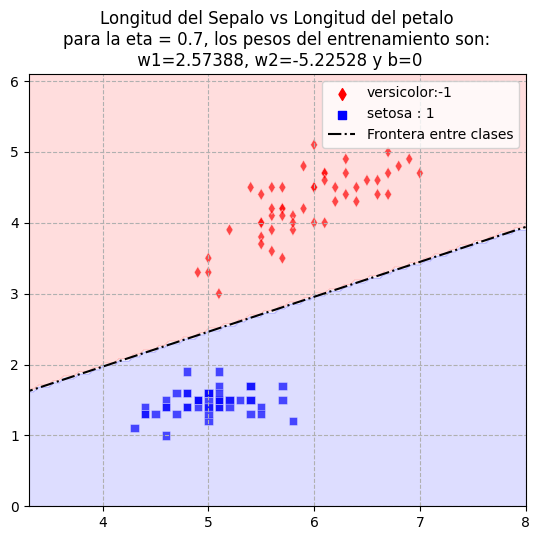

In [48]:
fig, ax = plt.subplots(1, 1,figsize=(5.5, 5.5))

#limites del grafico
x_max,y_max = X.max(axis=0)+1
x_min,y_min = X.min(axis=0)-1

# puntos del eje x para una linea 
x_line = np.linspace(x_min-10,x_max , 100)


# grilla de diferencia de clases
x_grid = np.linspace(x_min,x_max , 100)
y_grid = np.linspace(y_min,y_max , 100)
xx, yy = np.meshgrid(x_grid, y_grid)

# crea las graficas


w1 = pesos_y_sesgos_iris[1]
w2 = pesos_y_sesgos_iris[2]
b = pesos_y_sesgos_iris[0]

# grafico de dispersion de los datos 
sns.scatterplot( x=X[:,0],y=X[:,1],
            hue=y,palette=['red', 'blue'],
            style=y,markers=['d', 's'], 
            alpha=0.7)

# grilla de fondo
ax.grid(True, linestyle='--')

#titulo
ax.set_title(f'Longitud del Sepalo vs Longitud del petalo\n\
para la eta = {eta:.1f}, los pesos del entrenamiento son:\n \
w1={w1:.5f}, w2={w2:.5f} y b={b:.0f}')


# Establecer límites para el eje x
ax.set_xlim(x_min, x_max)
# Establecer límites para el eje y
ax.set_ylim(y_min, y_max)

#graficamos las linea recta de los pesos y sesgo
y_line = -w1/w2*x_line
ax.plot(x_line,y_line,linestyle='-.',color='black',
               label='leo')


#crea la region de cada clase
puntos_grilla = np.c_[xx.ravel(), yy.ravel()]
predict_grilla =modelo_iris.predict(puntos_grilla)
ax.contourf(xx, yy, predict_grilla.reshape(xx.shape),
           cmap=plt.cm.bwr.reversed(), alpha=0.15)



#leyendas
artistas, etiquetas = ax.get_legend_handles_labels()
ax.legend(handles=artistas, labels=['versicolor:-1'
                      ,'setosa : 1','Frontera entre clases'])
plt.tight_layout()

plt.show()

Vemos que para este caso si existe una recta de la forma y=mx que separa el conjunto en dos clases.
Ahora grafiquemos su error

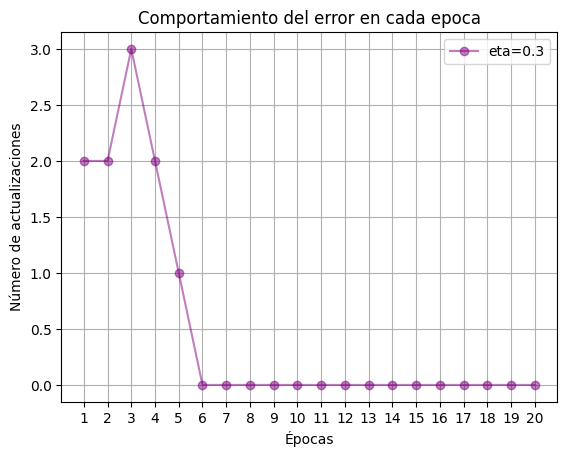

In [49]:
errores = modelo_iris.errors_
epocas = np.arange(1,len(errores)+1)

plt.plot(epocas,errores,alpha = 0.5,marker ='o',
         label = f'eta=0.3',color = "purple")
plt.legend()
plt.xticks(np.arange(1, len(errores) + 1, 1))
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')   
plt.grid(True)
plt.title("Comportamiento del error en cada epoca")
plt.show()

Vemos que converge en la epoca 5 de la misma forma que cuando no se tomara como cero el parametro bias.

¿Qué puede concluir?

La conclusión es la siguiente, si el conjunto de datos es separable por medio de una recta de la forma y=mx+b y se toma el parametro bias=0, entonces el perceptron encuentra los valores de los pesos W, tal que, separa el conjunto en dos clases como en el caso del iris data set que se muestra anteriormente, pero si el conjunto no es separable por medio de una recta de la forma y=mx como el caso del la compuerta AND, el perceptron no encuentra un conjunto de pesos que separen el conjunto en dos clases, pues , el conjunto no es separable, pero convegen los pesos a un valor como en el caso de la compuerta AND, aunque, este valor no separe adecuedamente las clases.

Por tanto, cuando quitamos el parametro bias del perceptron este pierde capacidad de separabilidad de los conjuntos, pues la frontera entre conjuntos la determina solo una recta de la forma y=mx, mientras que, si tenemos el parametro bias la frontera esta dada por una recta de la forma y=mx+b, y el perceptrón es mas capas de separar clases.